In [ ]:
!pip install scikit-learn matplotlib

Accuracy: 98.33%


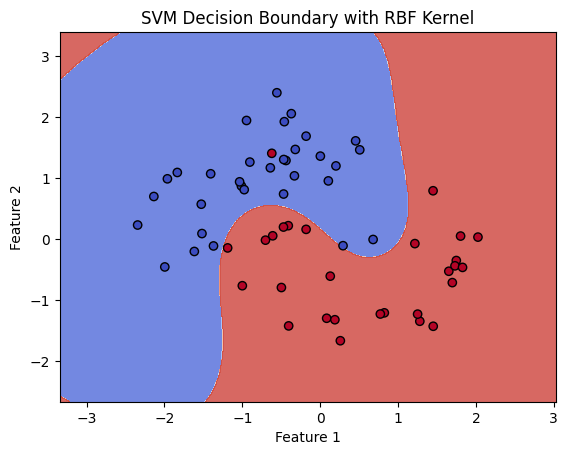

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', gamma='scale', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Function to visualize decision boundaries
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with RBF Kernel')
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(svm_classifier, X_test, y_test)

--- SVM with Linear Kernel ---
Accuracy: 83.33%
Specificity: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

--- SVM with RBF Kernel ---
Accuracy: 98.33%
Specificity: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



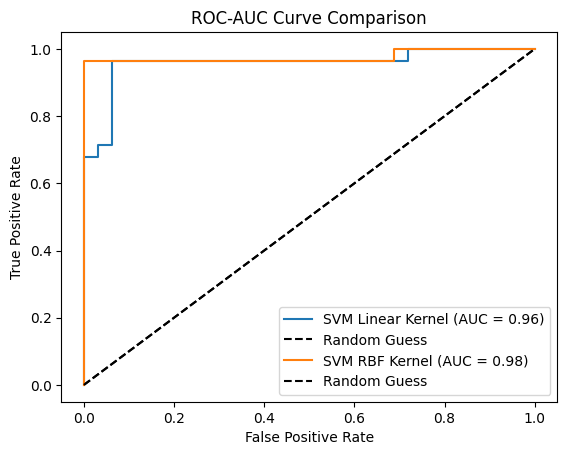

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

# Load dataset (e.g., moon dataset)
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    # Confusion Matrix for Specificity calculation
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Specificity: {specificity:.2f}")
    print("Classification Report:\n", class_report)

    return accuracy

# Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()

# Evaluate linear SVM
accuracy_linear = classification_metrics(y_test, y_pred_linear, "SVM with Linear Kernel")
plot_roc_auc(svm_linear, X_test, y_test, "SVM Linear Kernel")

# Evaluate RBF SVM
accuracy_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")
plot_roc_auc(svm_rbf, X_test, y_test, "SVM RBF Kernel")

# Show the ROC-AUC curves
plt.title("ROC-AUC Curve Comparison")
plt.show()

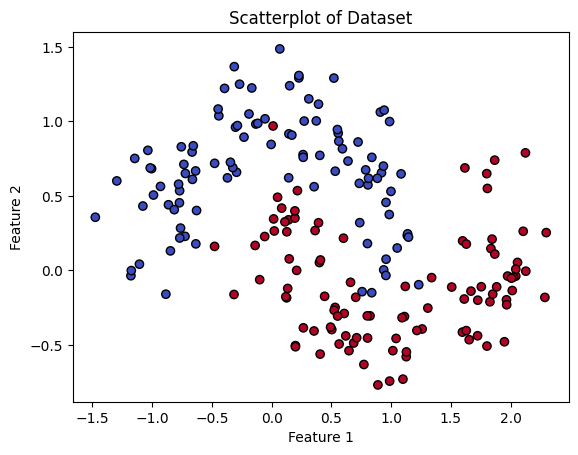

--- SVM with Linear Kernel ---
Accuracy: 83.33%
Specificity: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

--- SVM with RBF Kernel ---
Accuracy: 98.33%
Specificity: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



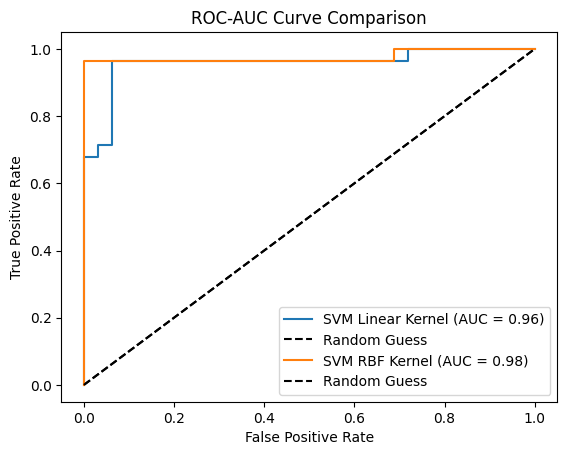

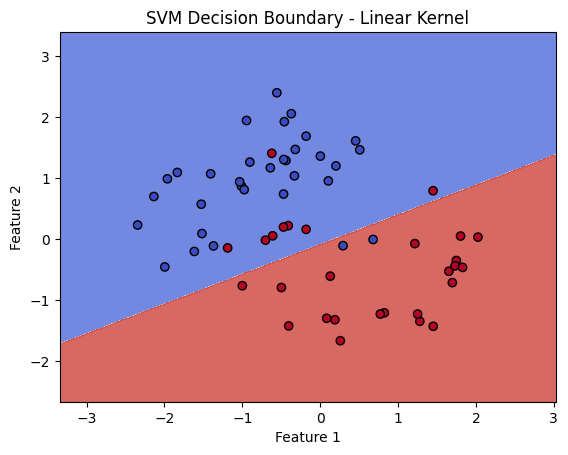

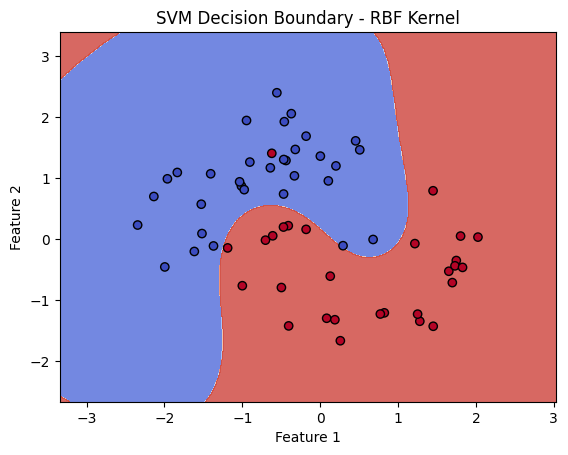

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix

# Load dataset (e.g., moon dataset)
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    # Confusion Matrix for Specificity calculation
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Specificity: {specificity:.2f}")
    print("Classification Report:\n", class_report)

    return accuracy

# Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()

# Scatterplot of the dataset
def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title('Scatterplot of Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Visualize the scatterplot
plot_data(X, y)

# Evaluate linear SVM
accuracy_linear = classification_metrics(y_test, y_pred_linear, "SVM with Linear Kernel")
plot_roc_auc(svm_linear, X_test, y_test, "SVM Linear Kernel")

# Evaluate RBF SVM
accuracy_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")
plot_roc_auc(svm_rbf, X_test, y_test, "SVM RBF Kernel")

# Show the ROC-AUC curves
plt.title("ROC-AUC Curve Comparison")
plt.show()

# Function to visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Visualize decision boundaries
plot_decision_boundary(svm_linear, X_test, y_test, "Linear Kernel")
plot_decision_boundary(svm_rbf, X_test, y_test, "RBF Kernel")